In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c

In [2]:
def data(lambdas, lambda0s, data_rate):
    frequency_sweep = c/lambdas
    lamda0s_data = np.zeros((len(lambda0s), len(lambdas)))
    for idd_lambda0, lambda0 in enumerate(lambda0s):
        # print(lambda0)
        diff_freq = c/lambda0 - frequency_sweep
        Tb = 1/(data_rate)
        tp = np.array(
            [0.5 * Tb * (np.sin(np.pi*f*Tb)/(np.pi*f*Tb))**2 for f in diff_freq])
        tp /= np.max(tp)
        lamda0s_data[idd_lambda0, :] = tp
    return lamda0s_data

(1.295, 1.325)

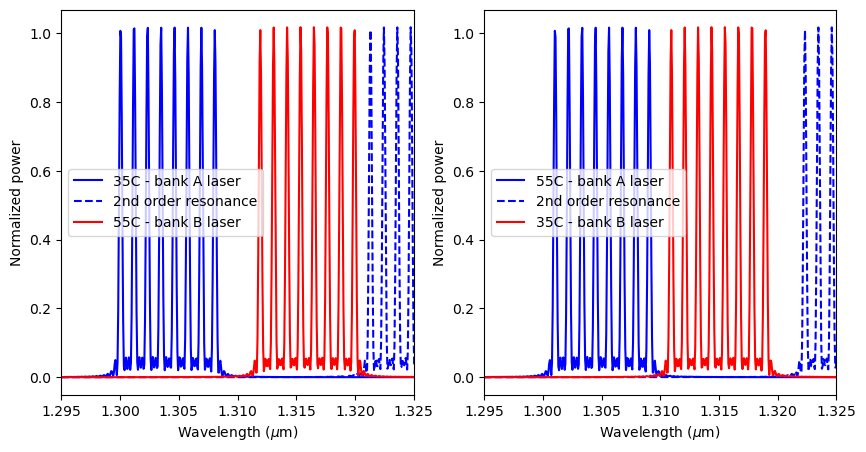

In [32]:
lambdas = np.linspace(1.28e-6, 1.34e-6, 1001)
lambda0 = 1.31e-6
channel_spacing = c/(c/lambda0 - 200e9) - lambda0


bank_a_bank_b_spacing = c/(c/lambda0 - 500e9) - lambda0
higher_order_resonance_spacing = c/(c/lambda0 - 1800e9) - lambda0
dT = 5
dT_lambda = dT * 1e-10

lambda0_bank_a = [lambda0 + channel_spacing * i - (bank_a_bank_b_spacing)/2 for i in range(-7, 1)]
lambda0_bank_b = [lambda0 + channel_spacing * i + (bank_a_bank_b_spacing)/2 for i in range(0, 8)]

data_series_a = data(lambdas, lambda0_bank_a, 56e9)
data_series_b = data(lambdas, lambda0_bank_b, 56e9)

data_bank_a = np.sum(data_series_a, axis=0)
data_bank_b = np.sum(data_series_b, axis=0)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(lambdas*1e6-dT_lambda*1e6, data_bank_a,'b',label="35C - bank A laser")
plt.plot(lambdas*1e6 + higher_order_resonance_spacing*1e6-dT_lambda*1e6, data_bank_b,'b',linestyle='--', label = "2nd order resonance")
plt.plot(lambdas*1e6+dT_lambda*1e6, data_bank_b,'r', label="55C - bank B laser")
plt.legend()
plt.xlim([1.295, 1.325])
plt.xlabel(r"Wavelength ($\mu$m)")
plt.ylabel("Normalized power")
plt.subplot(122)
plt.plot(lambdas*1e6+ dT_lambda*1e6, data_bank_a,'b',label="55C - bank A laser")
plt.plot(lambdas*1e6 + higher_order_resonance_spacing*1e6+dT_lambda*1e6, data_bank_b,'b',linestyle='--', label = "2nd order resonance")
plt.plot(lambdas*1e6-dT_lambda*1e6, data_bank_b,'r', label="35C - bank B laser")
plt.legend()
plt.xlabel(r"Wavelength ($\mu$m)")
plt.ylabel("Normalized power")
plt.xlim([1.295, 1.325])

In [ ]:
freq0_data